Manipulate trajectories of evolved solutions into other pyloric archetypes to preserve their relative timing and test whether the fitness function recognizes them

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
outputs = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/0/outputtrack.dat')
print(outputs.shape)

(10000, 3)


In [7]:
time = np.arange(0,100,0.01)

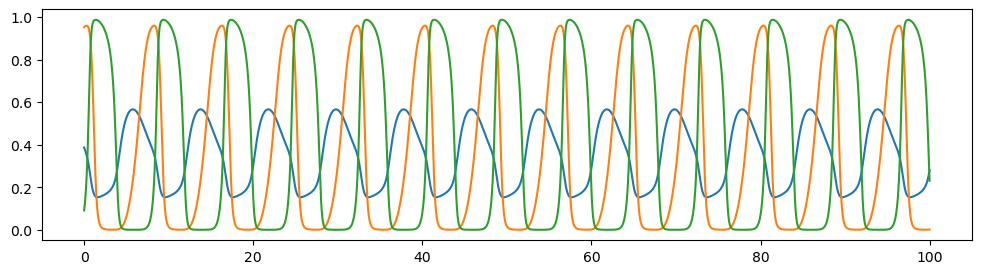

In [12]:
plt.rcParams['figure.figsize']=(12,3)
for i in range(len(outputs[0])):
    plt.plot(time,outputs[:,i])

In [19]:
#shift PY up by x timesteps
x = 500

shifted_outputs = np.zeros_like(outputs)
shifted_outputs[:,0::2] = outputs[:,0::2]
shifted_outputs[:-x,1] = outputs[x:,1]
shifted_outputs = shifted_outputs[:-x,:]
print(shifted_outputs)

[[0.386869   0.0629483  0.0910508 ]
 [0.38583    0.064368   0.0942243 ]
 [0.384785   0.0658078  0.0975051 ]
 ...
 [0.501634   0.00136613 0.00157135]
 [0.500609   0.00141393 0.00162468]
 [0.49958    0.00146441 0.00168017]]


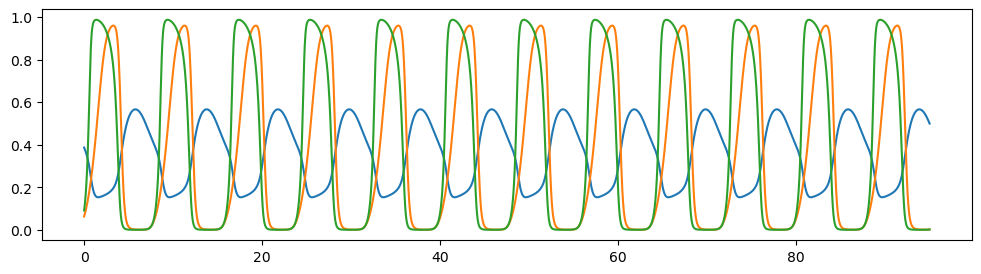

In [20]:
plt.rcParams['figure.figsize']=(12,3)
for i in range(len(outputs[0])):
    plt.plot(time[:-x],shifted_outputs[:,i])

In [22]:
#output this shifted timeseries to a new file
np.savetxt('./Specifically Evolved HP mechanisms/Every Circuit/0/shiftedoutputs.dat',shifted_outputs)